# Optimization

Given that the main purpose of the SigmaEpsilon ecosystem is to facilitate structural optimization, this submodule needs no further elaboration, as having a capable optimization toolkit is essential for the project. The overarching approach is to utilize third-party solutions whenever feasible, though we also provide essential solutions when necessary or fill in the gaps wherever required.

## Linear Programming (LP)

First, import some stuff. Note that the notebook requires matplotlib to be installed.

In [1]:
from sigmaepsilon.math.function import Function, Relation
from sigmaepsilon.math.optimize import LinearProgrammingProblem as LPP
import sympy as sy

One of the great features of the optimization module is that it handles symbolic functions pretty well. Problems can be defined using `SymPy` expressions, or simple strings. To solve a problem, call the `solve` method, which returns an instance of [scipy.optimize.OptimizeResult](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult).

In [2]:
x1, x2, x3, x4 = variables = sy.symbols(['x1', 'x2', 'x3', 'x4'])
obj = Function(3*x1 + 9*x3 + x2 + x4, variables=variables)
eq1 = Relation(x1 + 2*x3 + x4 - 4, variables=variables)
eq2 = Relation(x2 + x3 - x4 - 2, variables=variables)
bounds = [(0, None), (0, None), (0, None), (0, None)]
lpp = LPP(obj, [eq1, eq2], variables=variables, bounds=bounds)
solution = lpp.solve()
solution.x

array([0., 6., 0., 4.])

In [ ]:
solution

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 10.0
              x: [ 0.000e+00  6.000e+00  0.000e+00  4.000e+00]
            nit: 0
          lower:  residual: [ 0.000e+00  6.000e+00  0.000e+00  4.000e+00]
                 marginals: [ 1.000e+00  0.000e+00  4.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [ 2.000e+00  1.000e+00]
        ineqlin:  residual: []
                 marginals: []
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [ ]:
type(solution)

scipy.optimize._optimize.OptimizeResult

If the bounds for the variables are all the same, you can afford to input a single bound:

In [5]:
x1, x2, x3, x4 = variables = sy.symbols(['x1', 'x2', 'x3', 'x4'])
obj = Function(3*x1 + 9*x3 + x2 + x4, variables=variables)
eq1 = Relation(x1 + 2*x3 + x4 - 4, variables=variables)
eq2 = Relation(x2 + x3 - x4 - 2, variables=variables)
bounds = (0, None)
lpp = LPP(obj, [eq1, eq2], variables=variables, bounds=bounds)
lpp.solve().x

array([0., 6., 0., 4.])

Furthermore, if all the bounds are in the form $\geq$, you can omit the arguments for the parameter `bounds`, since it is the default value.

In [6]:
variables = sy.symbols(['x1', 'x2', 'x3', 'x4'])
obj = Function("3*x1 + 9*x3 + x2 + x4", variables=variables)
eq1 = Relation("x1 + 2*x3 + x4 = 4", variables=variables)
eq2 = Relation("x2 + x3 - x4 = 2", variables=variables)
lpp = LPP(obj, [eq1, eq2], variables=variables)
lpp.solve().x

array([0., 6., 0., 4.])

### 2d example with `matplotlib`

Consider the following problem:

$$
\begin{aligned}
    & \text{minimize}& \quad  x_1 + x_2 &\\
    & \text{subject to} & & \\
    & & x_1 &\geq 1, \\
    & & x_2 &\geq 1, \\
    & & x_1 + x_2 &\leq 4, \\
    & & x_i &\geq 0, \qquad i=1, 2.
\end{aligned}
$$


Setting up the problem is as follows.

In [7]:
variables = sy.symbols(['x1', 'x2'])
f = Function("x1 + x2", variables=variables)
ieq1 = Relation("x1 >= 1", variables=variables)
ieq2 = Relation("x2 >= 1", variables=variables)
ieq3 = Relation("x1 + x2 <= 4", variables=variables)
bounds = [(0, None), (0, None)]  # x1 >= 0, x2 >= 0
lpp = LPP(f, [ieq1, ieq2, ieq3], variables=variables, bounds=bounds)
x = lpp.solve().x
print("The optimal solution is x1 = {0}, x2 = {1}.".format(x[0], x[1]))

The optimal solution is x1 = 1.0, x2 = 1.0.


Now plotting with `Matplotlib`, with the feasible side of inequalities visualized by hatching, the ticks being on the infeasible side.

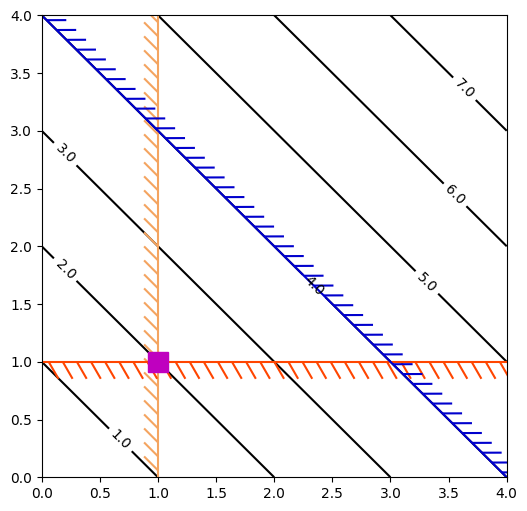

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects

fig, ax = plt.subplots(figsize=(6, 6))

nx = 100
ny = 100
xvec = np.linspace(0.0, 4.0, nx)
yvec = np.linspace(0.0, 4.0, ny)
x1, x2 = np.meshgrid(xvec, yvec)

obj = x1 + x2
g1 = x1 - 1
g2 = x2 - 1
g3 = x1 + x2 - 4

cntr = ax.contour(x1, x2, obj, colors='black')
ax.clabel(cntr, fmt="%2.1f", use_clabeltext=True)

cg1 = ax.contour(x1, x2, g1, [0], colors='sandybrown')
cg1.set(path_effects=[patheffects.withTickedStroke(angle=-135)])

cg2 = ax.contour(x1, x2, g2, [0], colors='orangered')
cg2.set(path_effects=[patheffects.withTickedStroke(angle=-60)])

cg3 = ax.contour(x1, x2, g3, [0], colors='mediumblue')
cg3.set(path_effects=[patheffects.withTickedStroke()])

ax.plot(x[0], x[1], 'ms', markersize=15)

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

plt.show()


### Linear Mixed-Integer Programs

If some of the design variables are constrained to integers, you can use the `integrality` parameter. As an example, consider the following problem:

$$
\begin{aligned}
    & \text{minimize}& \quad  3 x_2 + 2 x_3 &\\
    & \text{subject to} & & \\
    & & 2 x_1 + 2 x_2 - 4 x_3 &= 5, \\
    & & x_i &\geq 0, \qquad i=1, 2, 3, \\
    & & x_i &\in \mathbb{Z}, \qquad i=1, 3.
\end{aligned}
$$

In [9]:
variables = x1, x2, x3 = sy.symbols(["x1", "x2", "x3"])
obj = Function(3 * x2 + 2 * x3, variables=variables)
eq = Relation(2 * x1 + 2 * x2 - 4 * x3 - 5, op="=", variables=variables)
bounds = (0, None)
integrality = [1, 0, 1]
lpp = LPP(obj, [eq], variables=variables, bounds=bounds, integrality=integrality)
solution = lpp.solve()
solution.x

array([2. , 0.5, 0. ])

Another way to express the same integrality constraints is using assumptions when creating the SymPy variables of the problem.

In [10]:
x1, x3 = sy.symbols(["x1", "x3"], integer=True)
x2 = sy.symbols("x2")
variables = x1, x2, x3
obj = Function(3 * x2 + 2 * x3, variables=variables)
eq = Relation(2 * x1 + 2 * x2 - 4 * x3 - 5, op="=", variables=variables)
bounds = (0, None)
lpp = LPP(obj, [eq], variables=variables, bounds=bounds)
solution = lpp.solve()
solution.x

array([2. , 0.5, 0. ])

The solver in SciPy is capable of understanding more complex integrality constraints, colsult their API Reference for more details [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog). If you want to impose constraints like these, you must use the `integrality` parameter.

## Nonlinear Programming (NLP)

Nonlinear programming deals with problems where the objective function, the constraints, or both are nonlinear.

### Binary Genetic Algorithm (BGA)

Genetic algorithms (GAs) are a type of meteheuristic optimization algorithm inspired by the principles of natural selection and genetics. They are used to find approximate solutions to complex problems by mimicking the process of evolution. In a genetic algorithm, a population of potential solutions (individuals) is evolved over successive generations. Each individual is evaluated based on a fitness function, and the best-performing individuals are selected to create offspring through processes like crossover (recombination) and mutation. Over time, the population evolves toward better solutions. Genetic algorithms are particularly useful for solving problems with large, complex search spaces where traditional optimization methods might struggle. They are widely used in areas such as engineering, computer science, and artificial intelligence. **The class is designed to align with the 'survival of the fittest' principle by default, prioritizing maximization.**

We will demonstrate the efficiency of the BGA by minimizing the Rosenbrock function, a widely used benchmark problem for evaluating the performance of nonlinear programming methods.

In [11]:
from sigmaepsilon.math.optimize import BinaryGeneticAlgorithm as BGA
from typing import Iterable
from numbers import Number


def Rosenbrock(x: Iterable[Number], a: Number = 1, b: Number = 100) -> float:
    return (a - x[0]) ** 2 + b * (x[1] - x[0] ** 2) ** 2


ranges = [[-2, 2], [-1, 3]]
bga = BGA(Rosenbrock, ranges, length=12, nPop=100, minimize=True, maxage=20)

To solve the problem, call the `solve` method, which returns an instance of [Genom](..\api\api_optimization.nlp.rst#Genom).

In [13]:
result = bga.solve()
type(result), result.phenotype, result.fitness

(sigmaepsilon.math.optimize.ga.Genom,
 [1.024175824175824, 1.0483516483516482],
 0.0006186310481459753)

You can get a more detailed view about the actual state of the optimizer by accessing the `state` attribute of the instance.

In [14]:
bga.state

OptimizerState(x=[1.024175824175824, 1.0483516483516482], fun=0.0006186310481459753, n_fev=4100, n_jev=0, n_hev=0, n_iter=41, success=True, message='', stage=2)

This has a `to_scipy` method, if you prefer to see an instance of [scipy.optimize.OptimizeResult](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult) here. 

In [15]:
bga.state.to_scipy()

 message: 
 success: True
  status: 2
     fun: 0.0006186310481459753
       x: [ 1.024e+00  1.048e+00]
     nit: 41
    nfev: 4100
    njev: 0
    nhev: 0

If you want, you can have more control over the iterations using the `evolve` method, that runs a specified amount of evolutions:

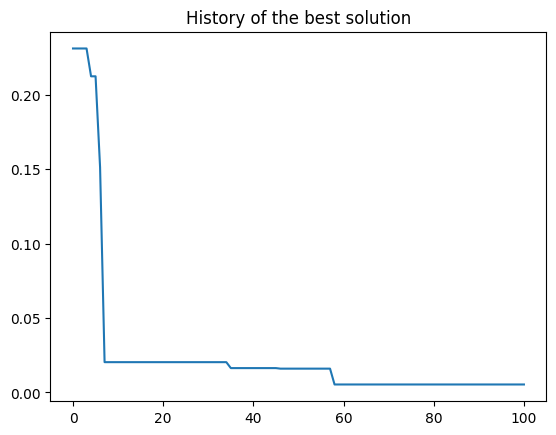

The minimum value is f(x) = 0.00538227051503521 at  x = [1.06031746031746, 1.1284493284493284].


In [17]:
import matplotlib.pyplot as plt

bga = BGA(Rosenbrock, ranges, length=12, nPop=100, minimize=True)
history = [Rosenbrock(bga.best_phenotype())]

for _ in range(100):
    bga.evolve(1)
    history.append(bga.champion.fitness)

plt.plot(history)
plt.title('History of the best solution')
plt.show()

x = bga.champion.phenotype
fx = bga.champion.fitness

print(f"The minimum value is f(x) = {fx} at  x = {x}.")

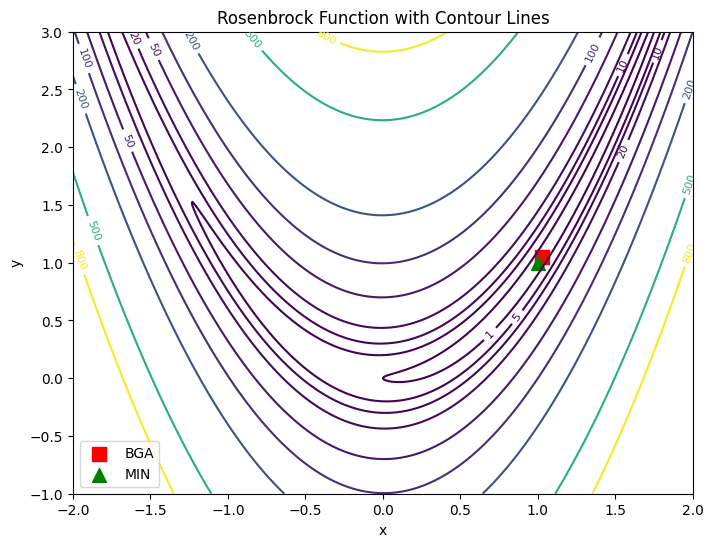

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Generate grid data
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = np.array([[Rosenbrock([xi, yi]) for xi, yi in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

# Create the plot with contour lines
plt.figure(figsize=(8, 6))
levels = [0, 1, 5, 10, 20, 50, 100, 200, 500, 800]
contour = plt.contour(X, Y, Z, levels=levels, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Rosenbrock Function with Contour Lines')
plt.xlabel('x')
plt.ylabel('y')

x = result.phenotype
plt.scatter(x[0], x[1], color="red", s=100, marker='s', label="BGA")

plt.scatter(1, 1, color="green", s=100, marker='^', label="MIN")

plt.legend()
plt.show()

In [19]:
variables = sy.symbols("x y")
obj = Function("(1-x)**2 + 100*(y-x**2)**2", variables=variables)
ranges = [[-2, 2], [-1, 3]]
bga = BGA(obj, ranges, length=12, nPop=100, minimize=True)
result = bga.solve()
result.phenotype, result.fitness

([1.2224664224664226, 1.4986568986568987], 0.05128292180908297)